In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


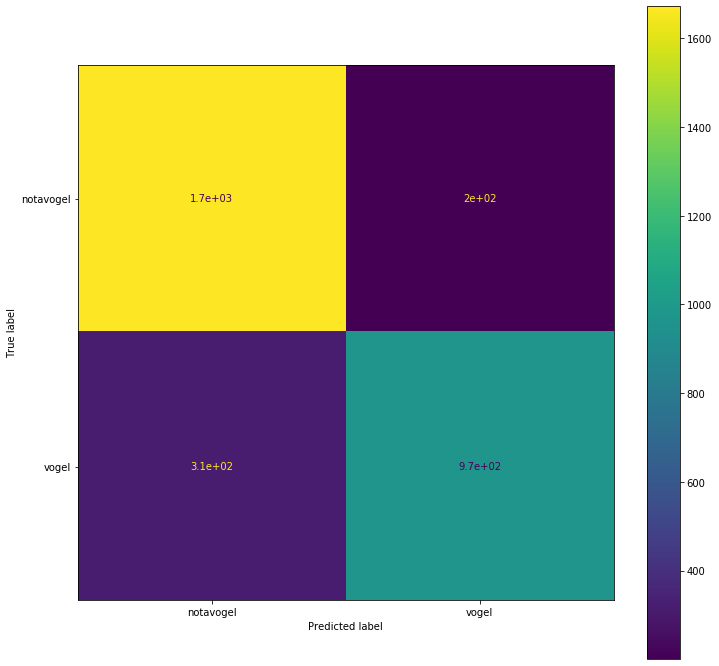

In [7]:

# Laden der CSV-Datei
data = pd.read_csv('../logs/stats.csv')

# Extrahieren der tatsächlichen und vorhergesagten Klassen
y_true = data['Actual Class']
y_pred = data['Predicted Class']

# Erstellen der Konfusionsmatrix
cm = confusion_matrix(y_true, y_pred, labels=data['Actual Class'].unique())

# Visualisierung der Konfusionsmatrix
disp = ConfusionMatrixDisplay(cm, display_labels=data['Actual Class'].unique())
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax)


In [8]:

# Ihre CSV-Datei einlesen
df = pd.read_csv('../logs/stats.csv')

# Eine leere Dictionary erstellen, um die Zuverlässigkeit für jede Klasse zu speichern
class_confidence = {}

# Durch die Zeilen des Dataframes iterieren
for index, row in df.iterrows():
    actual_class = row['Actual Class']
    confidence = row['Confidence']
    
    # Wenn die Klasse bereits in der Dictionary existiert, fügen Sie die Zuverlässigkeit hinzu
    if actual_class in class_confidence:
        class_confidence[actual_class].append(confidence)
    # Andernfalls erstellen Sie eine neue Liste für die Klasse
    else:
        class_confidence[actual_class] = [confidence]

# Durch die Dictionary iterieren und den Durchschnitt der Zuverlässigkeiten für jede Klasse berechnen
for class_name, confidences in class_confidence.items():
    average_confidence = sum(confidences) / len(confidences)
    print(f'Durchschnittliche Zuverlässigkeit für Klasse "{class_name}": {average_confidence}')

Durchschnittliche Zuverlässigkeit für Klasse "notavogel": 0.7359198428575074
Durchschnittliche Zuverlässigkeit für Klasse "vogel": 0.7489521675009437


In [9]:
# Ihre CSV-Datei einlesen
df = pd.read_csv('../logs/stats.csv')

# Eine Dictionary erstellen, um die Anzahl der korrekten Vorhersagen für jede Klasse zu speichern
correct_predictions = {}

# Eine Dictionary erstellen, um die Anzahl der Gesamtvorhersagen für jede Klasse zu speichern
total_predictions = {}

# Durch die Zeilen des Dataframes iterieren
for index, row in df.iterrows():
    actual_class = row['Actual Class']
    predicted_class = row['Predicted Class']
    
    # Überprüfen, ob die Vorhersage korrekt ist
    if actual_class == predicted_class:
        # Wenn die Klasse bereits in der Dictionary existiert, erhöhen Sie die Anzahl der korrekten Vorhersagen
        if actual_class in correct_predictions:
            correct_predictions[actual_class] += 1
        # Andernfalls erstellen Sie einen neuen Eintrag
        else:
            correct_predictions[actual_class] = 1
    
    # Wenn die Klasse bereits in der Dictionary existiert, erhöhen Sie die Anzahl der Gesamtvorhersagen
    if actual_class in total_predictions:
        total_predictions[actual_class] += 1
    # Andernfalls erstellen Sie einen neuen Eintrag
    else:
        total_predictions[actual_class] = 1

# Den Prozentsatz der Zuordnung für jede Klasse berechnen und ausgeben
for class_name, correct_count in correct_predictions.items():
    total_count = total_predictions[class_name]
    percentage = (correct_count / total_count) * 100
    print(f'Prozentsatz der Zuordnung für Klasse "{class_name}": {percentage:.2f}%')


Prozentsatz der Zuordnung für Klasse "notavogel": 89.27%
Prozentsatz der Zuordnung für Klasse "vogel": 75.51%


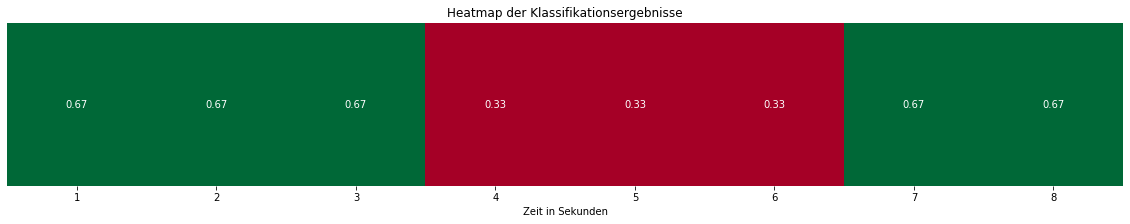

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Beispiel für Klassifikationsergebnisse und Zeitfenster (Nur zur Demonstration)
classification_results = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]  # 0 für Klasse 1 (rot), 1 für Klasse 2 (grün)
seconds = list(range(len(classification_results)))  # Sekunden für die Klassifikationen

# Berechnung des gleitenden Mittelwerts für die Klassifikationsergebnisse
rolling_means = []
for i in range(0, len(classification_results) - 2):
    mean_value = np.mean(classification_results[i:i + 3])
    rolling_means.append(mean_value)

# Heatmap darstellen
plt.figure(figsize=(20, 3))
sns.heatmap([rolling_means], annot=True, cmap='RdYlGn', cbar=False, xticklabels=seconds[1:-1])
plt.title('Heatmap der Klassifikationsergebnisse')
plt.xlabel('Zeit in Sekunden')
plt.yticks([], [])
plt.show()
